In [8]:
from PIL import Image
import pytesseract
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas
import pickle

In [9]:
i = 'scr.png'
o = 'gray.png'
t = 'template.png'

image = cv2.imread(i)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = gray[305:-130, 2:-2]

#cv2.imwrite(o, gray)

backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

#templ = cv2.imread(t, 0)
#trgb = cv2.cvtColor(templ, cv2.COLOR_GRAY2RGB)

#display(Image.fromarray(backtorgb))

In [ ]:
templ.shape

In [ ]:
#blur = backtorgb.copy()
blur = gray.copy()

#blur = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

#blur = cv2.blur()
#blur = cv2.bilateralFilter(blur, 9, 75, 75)
#blur = cv2.medianBlur(gray, 3, 30)
#blur = cv2.GaussianBlur(gray, (5,5), 0)

#plt.subplot(1,1,1),plt.imshow(th3,'gray')

#h, w, _ = trgb.shape
h, w = templ.shape

res = cv2.matchTemplate(blur, templ, cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(blur, pt, (pt[0] + w, pt[1] + h), (255,255,255), -1)


#display(Image.fromarray(gray))
display(Image.fromarray(blur))

In [8]:
cv2.imwrite('cut.png', blur)

True

In [267]:
gray.shape

(899, 746)

In [133]:
ga = backtorgb.copy()
print(ga[22,0:7])
print(ga[72,0:7])

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [254 254 254]
 [236 236 236]
 [236 236 236]]
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [254 254 254]
 [236 236 236]
 [236 236 236]]


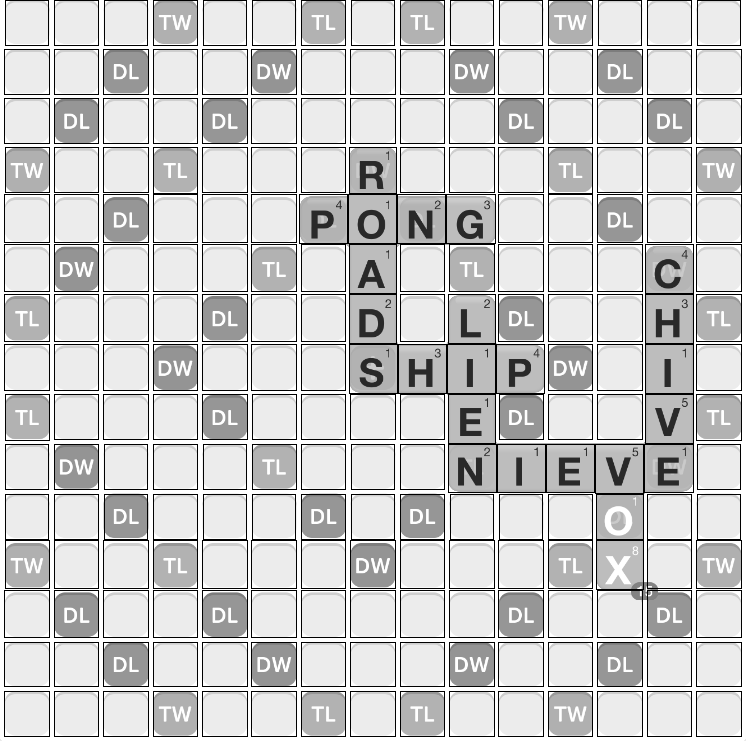

In [47]:
#color = True
color = False

start_pxl_w = 3
end_pxl_w = -3

if color:
    rows = backtorgb.copy()
else:
    rows = gray.copy()

rowspace = 49
#wanted_row = 7
wanted_row = 0

rows = rows[((wanted_row*rowspace) + 1):742]
#rows = rows[193:742]

check_y = 37
check_x = 22

white = 255
empty = 236


new_check = True

found_top = False
found_bottom = False
found_left = False
found_right = False

skip_rows = 0

skip_cols = 0
col_cnt = 0
skipped_cols = 0

max_top = 0
max_bottom = 0


def is_blank(val, c=white):
    if color:
        return all(va == c for va in val)
    else:
        return val == c

boxes = []

for rn, row in enumerate(rows):
    if rn < skip_rows:
        continue

    row_cut = row[start_pxl_w:end_pxl_w]
    
    if new_check:
        if not found_top:
            top_box_y = rn

        for cn, col in enumerate(row_cut):
            if not is_blank(col):
                top_box_y = max(rn, top_box_y)
                found_top = True

        if found_top:
            #print('== New {} =='.format((rn / 50) + 1))
            
            #print('start box Y at {}'.format(top_box_y))

            new_check = False
            skip_rows += check_y
                
    else:
        skip_cols = 0
        
        found_top = False
        found_bottom = False
        found_left = False
        found_right = False
        
        for cn, col in enumerate(row_cut):
            if cn < skip_cols:
                continue
            
            if not found_left:
                if skipped_cols > 0:
                    top_box_x = skipped_cols + 1
                    found_left = True
                elif not is_blank(col):
                    top_box_x = cn + start_pxl_w
                    found_left = True
                    
                if found_left:
                    #print('start box X at {}'.format(top_box_x))

                    col_cnt = 0
                    skip_cols = top_box_x + 40
            
            else:
                if col_cnt > 14:
                    bottom_box_x = (top_box_x + 48)
                    found_right = True
                    skipped_cols = bottom_box_x
                elif is_blank(col):
                    bottom_box_x = (cn + start_pxl_w - 1)
                    found_right = True
                    skipped_cols = 0
                else:
                    col_cnt += 1
            
                if found_right:
                    #print('end box X at {}'.format(bottom_box_x))
                    
                    check_vals = rows[rn:(rn + (49 - check_y)), (cn - check_x)]
                    for r, v in enumerate(check_vals):
                        if is_blank(v):
                            bottom_box_y = max(r, (45 - check_y)) + rn
                            found_bottom = True
                            break
                    
                    if not found_bottom:
                        bottom_box_y = len(check_vals) + rn
                        found_bottom = True
                    
                    #print('end box Y at {}'.format(bottom_box_y))
                    
                    max_bottom = max(max_bottom, bottom_box_y)
                    skip_rows = max_bottom + 1
                    
                    #b_type = 'mult'
                    #bottom_box_y - 7
                    
                    this_box = ((top_box_x, top_box_y), (bottom_box_x, bottom_box_y), )
                    boxes.append(this_box)
                    
                    #print(rows[this_box[1][1] -10][this_box[1][0] - 22])
                    #display(Image.fromarray(rows[this_box[0][1]:this_box[1][1], this_box[0][0]:this_box[1][0]]))
                    
                    #print('------')

                    found_left = False
                    found_right = False
                    found_bottom = False
            
            new_check = True            


#if color:

#else:
    #rows_copy = cv2.cvtColor(rows, cv2.COLOR_GRAY2RGB)

rows_copy = rows.copy()
    
for b in boxes:
    if color:
        cv2.rectangle(rows_copy, b[0], b[1], (255,0,0), 1)
    else:
        cv2.rectangle(rows_copy, b[0], b[1], 0, 1)

display(Image.fromarray(rows_copy))

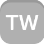

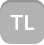

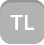

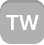

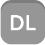

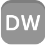

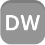

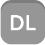

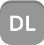

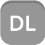

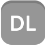

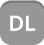

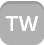

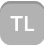

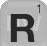

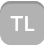

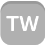

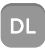

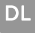

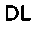

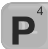

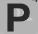

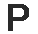

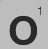

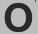

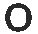

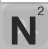

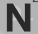

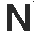

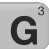

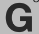

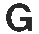

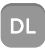

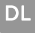

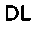

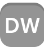

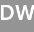

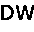

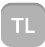

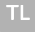

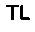

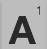

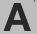

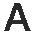

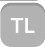

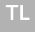

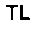

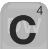

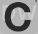

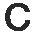

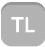

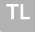

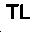

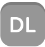

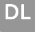

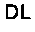

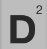

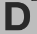

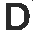

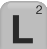

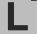

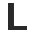

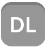

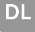

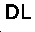

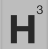

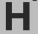

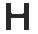

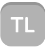

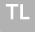

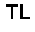

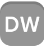

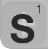

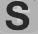

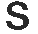

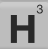

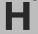

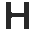

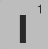

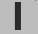

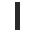

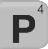

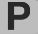

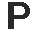

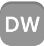

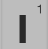

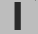

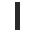

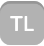

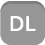

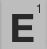

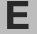

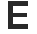

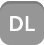

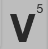

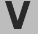

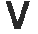

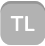

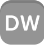

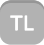

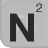

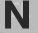

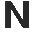

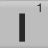

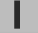

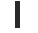

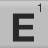

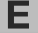

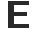

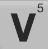

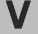

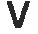

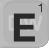

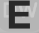

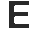

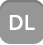

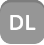

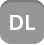

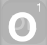

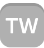

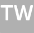

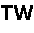

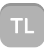

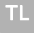

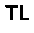

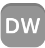

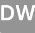

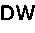

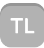

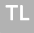

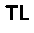

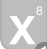

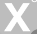

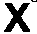

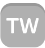

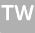

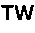

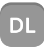

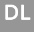

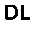

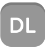

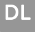

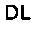

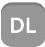

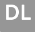

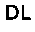

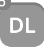

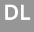

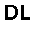

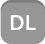

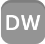

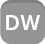

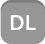

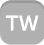

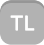

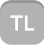

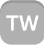

In [109]:
text_y_t = 13
text_y_b = 2
text_x_l = 5
text_x_r = 5

bi = 1

for ba, b in enumerate(boxes):
    b_s_x = b[0][0]
    b_s_y = b[0][1]
    b_e_x = b[1][0]
    b_e_y = b[1][1]

    start = rows[b_s_y + 22][b_s_x + 7]
    
    #cv2.rectangle(rows, b[0], b[1], (255,0,0), 1)
    
    if not is_blank(start, c=empty):
        display(Image.fromarray(rows[
            b[0][1]:b[1][1],
            b[0][0]:b[1][0]
        ]))
        crop_img = rows[
            b_s_y + text_y_t:b_e_y - text_y_b,
            b_s_x + text_x_l:b_e_x - text_x_r
        ]
        
        if color:
            crop_gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY).copy()
        else:
            crop_gray = crop_img.copy()

        display(Image.fromarray(crop_gray))
        
        fn = 'boxes/{}_nat.png'.format(ba)
        cv2.imwrite(fn, crop_gray)
        
        has_white = crop_gray[np.where(crop_gray==255)]
        if len(has_white):
            crop_gray[np.where(crop_gray>=203)] = 0
            crop_gray[np.where(crop_gray!=0)] = 255
        else:
            crop_gray[np.where(crop_gray>=50)] = 255
            
        display(Image.fromarray(crop_gray))
        
        fn = 'boxes/{}.png'.format(ba)
        cv2.imwrite(fn, crop_gray)
        
        #crop_gray = cv2.threshold(crop_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        #crop_gray = cv2.medianBlur(crop_gray, 3)

        #display(Image.fromarray(crop_gray))
        
        #fn = 'i_{}.png'.format(bi)
        #cv2.imwrite(fn, crop_gray)
        
        bi += 1

 56 =>: TL
--------------


 59 =>: TW
--------------


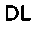

 62 =>: DL
--------------


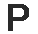

 66 =>: P
--------------


In [113]:
conf = '--psm 8 --oem 0 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZ"'

for ix in range(55,67):
#for ix in range(225):
    na = 'boxes/{}'.format(ix)
    
    iu = cv2.imread(na + '.png', cv2.IMREAD_GRAYSCALE)
    if not np.any(iu):
        continue
    
    display(Image.fromarray(iu))

    text = pytesseract.image_to_string(iu, config=conf)
    print(' {} =>: {}'.format(ix, text))

    
    #iw = cv2.imread(na + '.png')

    #display(Image.fromarray(iw))

    #text = pytesseract.image_to_string(iw, lang='eng', config=conf)
    #print('=>: {}'.format(text))


    #crop_gray = cv2.threshold(crop_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    #crop_gray = cv2.medianBlur(crop_gray, 3)

    #display(Image.fromarray(crop_gray))

    #fn = 'i_{}.png'.format(bi)
    #cv2.imwrite(fn, crop_gray)
    #text = pytesseract.image_to_string(f
    
    print('--------------')

In [59]:
new_g = iu = cv2.imread('boxes/59_nat.png', cv2.IMREAD_GRAYSCALE)
new_g[np.where(new_g >= 203)] = 0
new_g[np.where(new_g != 0)] = 255
display(Image.fromarray(new_g))

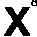

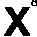

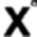

In [27]:
ff = cv2.imread('boxes/64.png', cv2.IMREAD_GRAYSCALE)

display(Image.fromarray(ff))

#x = cv2.medianBlur(blur, 3)

ff = cv2.threshold(ff, 132, 255, cv2.THRESH_BINARY)[1]

display(Image.fromarray(ff))

ff = cv2.GaussianBlur(ff, (5,5), 0)


display(Image.fromarray(ff))

In [10]:
#ignore plus on start

middle_x = [''] * 14

middle_x[3] = '2w'
middle_x[10] = '2w'

middle_y = [['']] * 15

middle_y[3] = ['2w']
middle_y[7] = ['x']
middle_y[11] = ['2w']

quad_tl = np.array([[''] * 7] * 7, dtype='U2')

quad_tl[0][3] = '3w'
quad_tl[0][6] = '3l'
quad_tl[1][2] = '2l'
quad_tl[1][5] = '2w'
quad_tl[2][1] = '2l'
quad_tl[2][4] = '2l'
quad_tl[3][0] = '3w'
quad_tl[3][3] = '3l'
quad_tl[4][2] = '2l'
quad_tl[4][6] = '2l'
quad_tl[5][1] = '2w'
quad_tl[5][5] = '3l'
quad_tl[6][0] = '3l'
quad_tl[6][4] = '2l'

quad_bl = np.flip(quad_tl, 0)
quad_tr = np.flip(quad_tl, 1)
quad_br = np.flip(quad_tl, (0,1))

quad_left = np.concatenate((quad_tl, quad_bl))
quad_right = np.concatenate((quad_tr, quad_br))

full = np.concatenate((quad_left, quad_right), axis=1)
full = np.insert(full, 7, middle_x, axis=0)
full = np.insert(full, [7], middle_y, axis=1)

In [13]:
df_default = pandas.DataFrame(full)
df_default

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,3w,,,3l,,3l,,,3w,,,
1,,,2l,,,2w,,,,2w,,,2l,,
2,,2l,,,2l,,,,,,2l,,,2l,
3,3w,,,3l,,,,2w,,,,3l,,,3w
4,,,2l,,,,2l,,2l,,,,2l,,
5,,2w,,,,3l,,,,3l,,,,2w,
6,3l,,,,2l,,,,,,2l,,,,3l
7,,,,2w,,,,x,,,,2w,,,
8,3l,,,,2l,,,,,,2l,,,,3l
9,,2w,,,,3l,,,,3l,,,,2w,


In [12]:
table = np.array([[''] * 15] * 15)

conf = '--psm 8 --oem 0 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZ"'

#for ix in range(43):
for ix in range(225):
    fold = 'boxes'
    fina = '{}.png'.format(ix)
    fint = '{}_nat.png'.format(ix)
    na = '{}/{}'.format(fold, fina)
    nat = '{}/{}'.format(fold, fint)
    
    iu = cv2.imread(na, cv2.IMREAD_GRAYSCALE)
    if not np.any(iu):
        continue

    text = pytesseract.image_to_string(iu, config=conf)
    
    if text in ('TW', 'DW', 'TL', 'DL'):
        row = (ix // 15)
        col = ix % 15
        
        if text == 'TW' and full[row][col] != '3w':
            print('problem')
        elif text == 'DW' and full[row][col] != '2w':
            print('problem')
        elif text == 'TL' and full[row][col] != '3l':
            print('problem')
        elif text == 'DL' and full[row][col] != '2l':
            print('problem')
        
        os.rename(na, '{}/old/{}'.format(fold, fina))
        os.rename(nat, '{}/old/{}'.format(fold, fint))
    
    elif len(text) == 1:
        row = (ix // 15)
        col = ix % 15
        
        table[row][col] = text
        
df = pandas.DataFrame(table)
print(df)

   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14
0                                              
1                                              
2                                              
3                        R                     
4                     P  O  N  G               
5                        A                 C   
6                        D     L           H   
7                        S  H  I  P        I   
8                              E           V   
9                              N  I  E  V  E   
10                                      O      
11                                      X      
12                                             
13                                             
14                                             


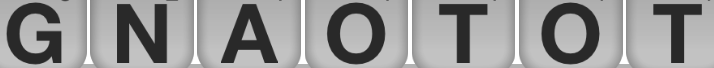

GNAOTOT


In [14]:
#bottomgray = gray[794:, 2:-2]
bottomgray = gray[823:-8, 16:-16]

#cv2.imwrite(o, gray)

#backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

#templ = cv2.imread(t, 0)
#trgb = cv2.cvtColor(templ, cv2.COLOR_GRAY2RGB)

display(Image.fromarray(bottomgray))

print(pytesseract.image_to_string(bottomgray, config=conf))

In [15]:
bg_cop = bottomgray.copy()

letters = []

for i in range(0,7*107,107):
    bg_tl_x = i
    bg_tl_y = 0
    bg_br_x = i + 69
    bg_br_y = 66

    blet = bg_cop[bg_tl_y:bg_br_y, bg_tl_x:bg_br_x]

    blet[np.where(blet>=50)] = 255
    
    text = pytesseract.image_to_string(blet, config=conf)
    print(text)
    
    letters.append(text)
    
print(letters)

G
N
A
O
T
O
T
['G', 'N', 'A', 'O', 'T', 'O', 'T']


In [5]:
letter_vals = {
        'A': ('9', '1'),
        'B': ('2', '4'),
        'BLANK': ('2', '0'),
        'C': ('2', '4'),
        'D': ('5', '2'),
        'E': ('13', '1'),
        'F': ('2', '4'),
        'G': ('3', '3'),
        'H': ('4', '3'),
        'I': ('8', '1'),
        'J': ('1', '10'),
        'K': ('1', '5'),
        'L': ('4', '2'),
        'M': ('2', '4'),
        'N': ('5', '2'),
        'O': ('8', '1'),
        'P': ('2', '4'),
        'Q': ('1', '10'),
        'R': ('6', '1'),
        'S': ('5', '1'),
        'T': ('7', '1'),
        'U': ('4', '2'),
        'V': ('2', '5'),
        'W': ('2', '4'),
        'X': ('1', '8'),
        'Y': ('2', '3'),
        'Z': ('1', '10')
}

In [2]:
wordlist = open('wordlist.txt', 'r')
words = wordlist.read().splitlines()
#pickle.dump(l, open('wordlist.pkl','wb'))

In [18]:
lonboard = []
for i in df.values.flatten():
    if i != '':
        lonboard.append(i)
lonboard

['R',
 'P',
 'O',
 'N',
 'G',
 'A',
 'C',
 'D',
 'L',
 'H',
 'S',
 'H',
 'I',
 'P',
 'I',
 'E',
 'V',
 'N',
 'I',
 'E',
 'V',
 'E',
 'O',
 'X']

In [17]:
print(df)
print(df_default)

   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14
0                                              
1                                              
2                                              
3                        R                     
4                     P  O  N  G               
5                        A                 C   
6                        D     L           H   
7                        S  H  I  P        I   
8                              E           V   
9                              N  I  E  V  E   
10                                      O      
11                                      X      
12                                             
13                                             
14                                             
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0               3w          3l      3l          3w            
1           2l          2w              2w          2l        
2       2l          2l                     

In [ ]:
class Node:
    def __init__(self, )

In [17]:
totl = lonboard + letters
print(letters)
print(lonboard)
print(totl)

for w in words[300]:
    if not any(v in w for v in letters):
        continue

    lor = set(lonboard)
    ler = letters
    
    bad = False
    for le in w:
        if le in ler:
            ler.remove(le)
    
    #if not all(v in w for v in ler)

['G', 'N', 'A', 'O', 'T', 'O', 'T']
['R', 'P', 'O', 'N', 'G', 'A', 'C', 'D', 'L', 'H', 'S', 'H', 'I', 'P', 'I', 'E', 'V', 'N', 'I', 'E', 'V', 'E', 'O', 'X']
['R', 'P', 'O', 'N', 'G', 'A', 'C', 'D', 'L', 'H', 'S', 'H', 'I', 'P', 'I', 'E', 'V', 'N', 'I', 'E', 'V', 'E', 'O', 'X', 'G', 'N', 'A', 'O', 'T', 'O', 'T']


In [19]:
df.to_pickle('board.pkl')
df_default.to_pickle('default_board.pkl')